In [1]:
library(rstan)
library(brms)

rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: StanHeaders
Loading required package: ggplot2
rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: Rcpp
Loading 'brms' package (version 2.9.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').

Attaching package: ‘brms’

The following object is masked from ‘package:rstan’:

    loo



In [4]:
sales_weather <- read.csv("https://raw.githubusercontent.com/logics-of-blue/book-r-stan-bayesian-model-intro/master/book-data/3-6-1-beer-sales-3.csv")

In [5]:
head(sales_weather)

sales,weather
<dbl>,<fct>
48.5,cloudy
64.8,cloudy
85.8,cloudy
45.0,cloudy
60.8,cloudy
64.0,cloudy


In [6]:
summary(sales_weather)

     sales          weather  
 Min.   : 25.20   cloudy:50  
 1st Qu.: 56.12   rainy :50  
 Median : 68.85   sunny :50  
 Mean   : 69.59              
 3rd Qu.: 79.95              
 Max.   :116.00              

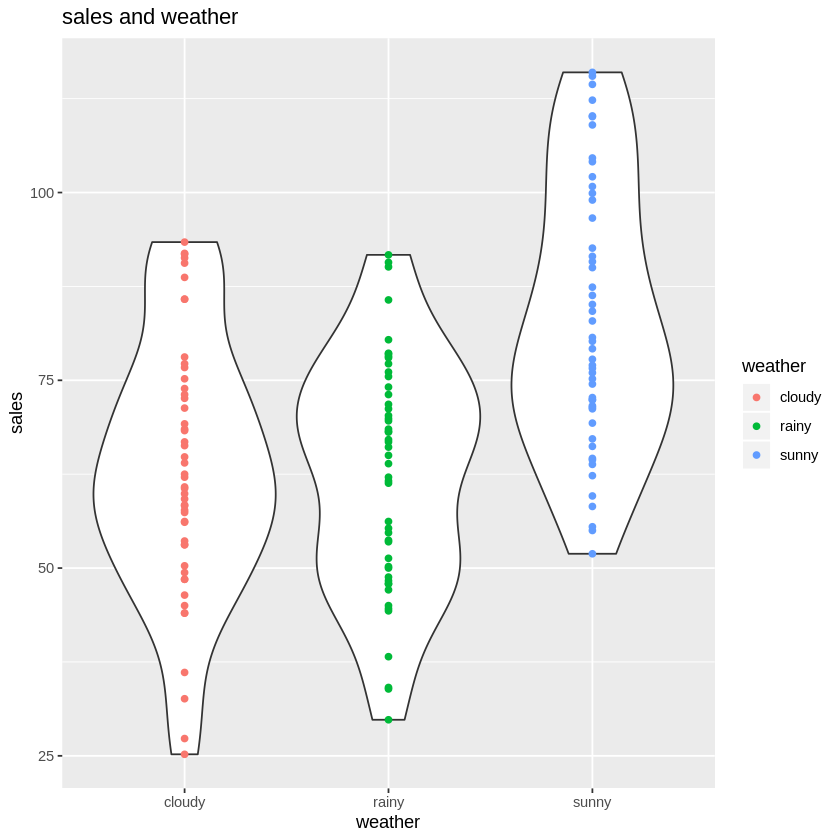

In [7]:
ggplot(data = sales_weather, mapping = aes(x = weather, y = sales)) + geom_violin() + geom_point(aes(color = weather)) + labs(title = "sales and weather")

In [8]:
anoba_brms <- brm(
    formula = sales ~ weather,
    family = gaussian(),
    data = sales_weather,
    seed = 1,
    prior = c(set_prior("", class = "Intercept"), set_prior("", class = "sigma"))
)

Compiling the C++ model
Start sampling


In [10]:
anoba_brms

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: sales ~ weather 
   Data: sales_weather (Number of observations: 150) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
             Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
Intercept       63.06      2.43    58.33    67.85       3420 1.00
weatherrainy    -0.36      3.42    -6.99     6.25       3474 1.00
weathersunny    19.97      3.47    13.04    26.85       3667 1.00

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
sigma    16.93      1.00    15.13    19.08       3762 1.00

Samples were drawn using sampling(NUTS). For each parameter, Eff.Sample 
is a crude measure of effective sample size, and Rhat is the potential 
scale reduction factor on split chains (at convergence, Rhat = 1).

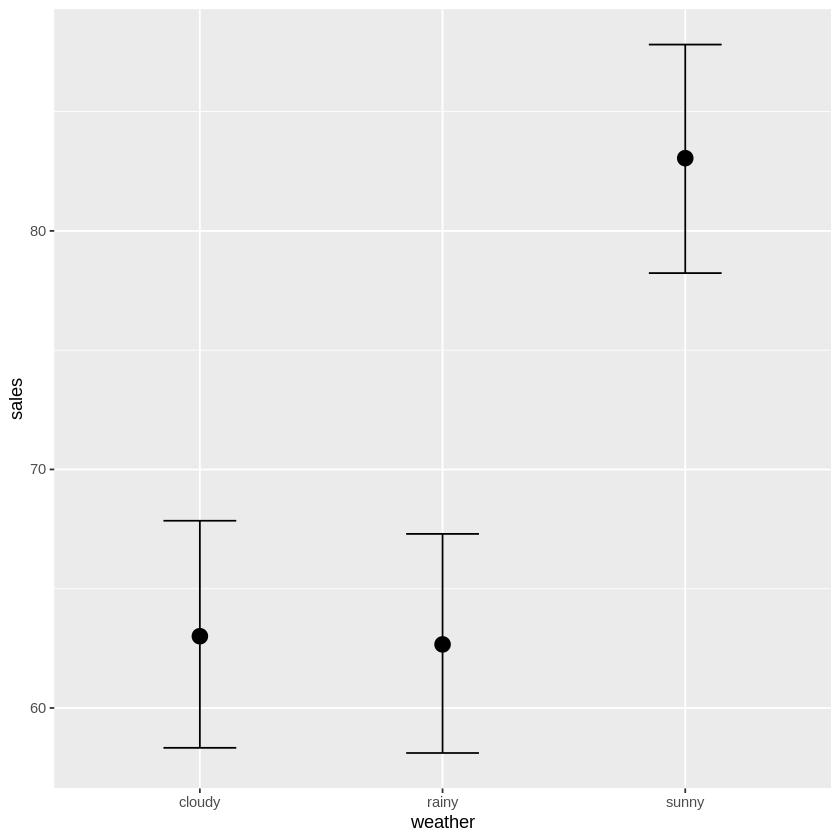

In [11]:
eff <- marginal_effects(anoba_brms)
plot(eff, points = FALSE)